In [103]:
import idx2numpy
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = idx2numpy.convert_from_file("/Volumes/Chaitrali/ML/Neural Networks/train-images-idx3-ubyte")
y= idx2numpy.convert_from_file("/Volumes/Chaitrali/ML/Neural Networks/train-labels-idx1-ubyte")
y=pd.get_dummies(y)

X=data.reshape(60000,784)
y1=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2,random_state=42)
print(X_train.shape)

(48000, 784)


### Visualize the Input Data

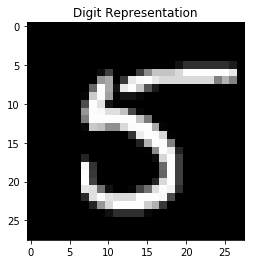

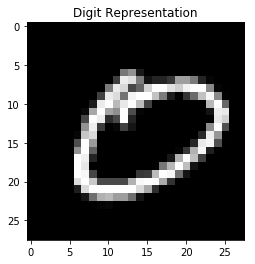

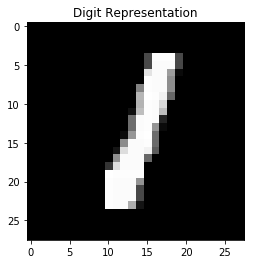

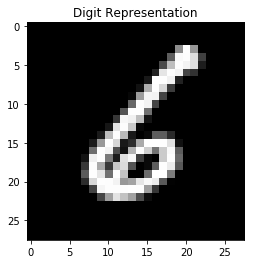

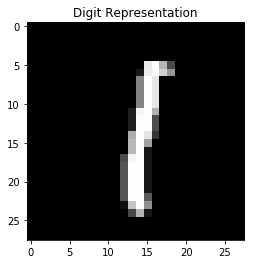

In [120]:
for i in range(0,5):    
    pixels=X_train[i]
    label=y_train[i]
    pixels = np.array(pixels, dtype='float')
    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((28, 28))
    # Plot
    plt.title('Digit Representation')
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [104]:
def create_weights(nh1,nh2,sample,output_n):
    
    weights_hidden1=np.random.randn(sample,nh1)* np.sqrt(1. / sample)
    bias_hidden1=np.zeros((1,nh1))
    
    weights_hidden2=np.random.randn(nh1,nh2)* np.sqrt(1. / nh1)
    bias_hidden2=np.zeros((1,nh2))
    weights_output=np.random.randn(nh2,output_n)* np.sqrt(1. / nh2)
    bias_output=np.zeros((1,output_n))
    return weights_hidden1,bias_hidden1,weights_hidden2,bias_hidden2, weights_output,bias_output

In [105]:
def tanh(z):
    a= (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
    return a
def tanh_der(z):
    a= 1 - (z**2)
    return a
def sigmoid(x):   
#sigmoid activation function
    s = 1 / (1 + np.exp(-x))
    return s
def sigmoid_der(x):
    return x*(1-x)

In [106]:

#feed forward
def feed_forward(X,w1,b1,w2,b2,w3,b3,act):
    act=act
    
    #product of w1.x
    z1=np.dot(X,w1)+b1
    
    #Activation functions
    if act == "sigmoid":
        a1=sigmoid(z1)
    else:
        a1=tanh(z1)
  
    #product of w2.Activation1
    z2=np.dot(a1,w2) + b2
    
    #Activation functions
    if act == "sigmoid":
        a2=sigmoid(z2)
    else:
        a2=tanh(z2)
    
    #product of w3.Activation2
    z3=np.dot(a2,w3) + b3
    
    #Activation output layer=softmax
    a3= np.exp(z3) / np.sum(np.exp(z3), axis=0,keepdims=True)
    
    return a1,z1,a2,z2,a3,z3


In [107]:
def error(pred, real):
    n_samples = real.shape[0]
    res = pred - real
    return res/n_samples

#Back propogation
def back_prop(X,y,a1,a2,a3,w2,w3,act):
    #return gradients of corresponding weights and bias
    
    #error from last
    dz3=error(a3,y)
    
    #grads from last layer
    dw3=np.dot(a2.T,dz3)
    db3 =np.sum(dz3, axis=0, keepdims=True)
    
    #back propgate through 2nd layer
    da2 = np.dot(dz3,w3.T)
    
    if act == "sigmoid":
        dz2 = da2 * sigmoid_der(a2)
    else:
        dz2= da2 * tanh_der(a2)
        
    #grads from hidden layer 
    dw2=np.dot(a1.T,dz2)
    db2 =np.sum(dz2, axis=0, keepdims=True)
    
   # back propgate through first layer
    da1 = np.dot(dz2,w2.T)
    
    if act == "sigmoid":
        dz1 = da1 * sigmoid_der(a1)
    else:
        dz1= da1 * tanh_der(a1)
    
    # gradients at first hidden layer 
    dw1 = np.dot(X.T,dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)
    
    return dw1,dw2,db1,db2,dw3,db3    

In [108]:
#Cross Entropy Loss
def compute_loss(Y, Y_hat):
    n_samples = Y.shape[0]
    logp = - np.log(Y_hat[np.arange(n_samples), Y.argmax(axis=1)])
    #print("logp: "+str(logp))
    loss = np.sum(logp)/n_samples
    return loss
     

In [109]:
#training the model
def train(X,y,nh1,nh2,lr,act,e):
    "hyperparameters tuning"
    epoch=int(e)+1
    sample=784
    output_n=10
    beta=0.999
    acc=[]
    train_loss=[]
    epochs = range(1,epoch)
    w1,b1,w2,b2,w3,b3=create_weights(nh1,nh2,sample,output_n)
    
    #for xor data weight will be initialized as follows:
    #w1,b1,w2,b2=create_weights(nh,3,2)
    
    for i in range(e):
        a1,z1,a2,z2,a3,z3=feed_forward(X,w1,b1,w2,b2,w3,b3,act)
        #returns gradient for weight update
        dw1,dw2,db1,db2,dw3,db3=back_prop(X,y,a1,a2,a3,w2,w3,act)
       
        dw1=beta*dw1+(1.0-beta)*dw1
        dw2=beta*dw2+(1.0-beta)*dw2
        db1=beta*db1+(1.0-beta)*db1
        db2=beta*db2+(1.0-beta)*db2
        dw3=beta*dw3+(1.0-beta)*dw3
        db3=beta*db3+(1.0-beta)*db3
        
        #update weights and bias for next epoch--gradient descent
        w1=w1-(lr*dw1)
        b1=b1-(lr*db1)
        w2=w2-(lr*dw2)
        b2=b2-(lr*db2)
        w3=w3-(lr*dw3)
        b3=b3-(lr*db3)
        
        #feedforward new weights
        a1,z1,a2,z2,a3,z3=feed_forward(X,w1,b1,w2,b2,w3,b3,act)
        #cross-entropy loss
        loss=compute_loss(y,a3)
        train_loss.append(loss)
        a21=np.argmax(a3,axis=1)
        y1=np.argmax(y,axis=1)
        a=accuracy_score(y1, a21)*100
        acc.append(a)
    print("train_loss: "+str(loss))
    
    plt.plot(epochs,acc,'g')
    plt.title('Accuracy of Training')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    
    #predict test
    a1,z1,a2,z2,a3,z3=feed_forward(X_test,w1,b1,w2,b2,w3,b3,act)
    test_loss=compute_loss(y_test,a3)
    print("test_loss: "+str(test_loss))
    a22=np.argmax(a3,axis=1)
    y2=np.argmax(y_test,axis=1)
    accu=accuracy_score(y2, a22)*100
    print("Accuracy of Test data:"+str(accu))

train_loss: 9.412944955608959


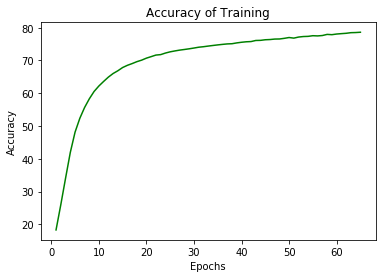

test_loss: 8.047993859806368
Accuracy of Test data:78.2


In [111]:
nh1=128
nh2=64
lr=0.05
act="tanh"
e=65
train(X_train,y_train,nh1,nh2,lr,act,e) 